# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/ziya07/psychological-state-identification-dataset

## Problem description

This project focuses on a comprehensive dataset capturing physiological, behavioral, and environmental data from biosensors to study students' psychological states during educational activities. It lays the foundation for advanced machine learning research, aiming to develop models capable of real-time analysis of stress, emotional engagement, and focus. Key features include heart rate variability, EEG power bands, environmental factors like noise and light, and behavioral metrics such as focus duration. By offering insights into well-being and engagement, the dataset aims to advance mental health support and optimize learning experiences through innovative applications of biosensor technology.

### Column description
| No.| Column      | Description | Type |
| -- | ----------- | ----------- | -- |
| 1. | ID | Unique identifier for each participant. | Integer|
| 2. | Time | Timestamp indicating when the data was recorded.| Datetime|
| 3. | HRV (ms) | Heart Rate Variability-Indicates stress and relaxation states. | Float
| 4. | Gen(GSR) (μS) | Galvanic Skin Response-Reflects stress through changes in skin conductivity. |Float |
| 5. | EEG Power Bands | Captures brain activity in Delta, Alpha, and Beta bands. | Float|
| 6. | Blood Pressure (mmHg) | Measures cardiovascular response. |Integer |
| 7. | Oxygen Saturation (%) | Indicates oxygen levels in the blood. |Float |
| 8. | Heart Rate (BPM) | Shows physical or emotional excitement. |Integer |
| 9. | Ambient Noise (dB) | Noise intensity during educational activities. |Float |
| 10. | Cognitive Load | Low, Moderate, High- reflects mental effort. |Categorical |
| 11. | Mood State | Happy, Neutral, Sad, Anxious- represents emotional conditions. |Categorical | 
| 12. | Psychological State | Stressed, Relaxed, Focused, Anxious- inferred from biosensor data.|Categorical | 
| 13. | Respiration Rate (BPM) | Measures breathing activity |Integer | 
| 14. | Skin Temp (°C) | Indicates stress or comfort levels. |Float | 
| 15. | Focus Duration (s) | Time spent in sustained attention on a task. |Integer |
| 16. | Task Type | Lecture, Group Discussion, Assignment, Exam. |Categorical |
| 17. | Age |Participant age. |Integer |
| 18. | Gender | Male, Female |Categorical |
| 19. | Educational Level | High School, Undergraduate, Postgraduate |Categorical |
| 20. | Study Major |Science, Arts, Engineering |Categorical |

# Dependencies loading

In [2]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# dataset split
# from sklearn.model_selection import train_test_split

# missing values imputing
# from sklearn.impute import KNNImputer
from kedro.io import DataCatalog
import yaml
import os
# np.random.seed(2024)

# Data loading

In [3]:
# move to the root directory
os.chdir(os.path.dirname(os.getcwd()))
# load the catalog
with open("conf/base/catalog.yml") as f:
    conf_catalog = yaml.safe_load(f)
catalog = DataCatalog.from_config(conf_catalog)

In [4]:
data = catalog.load("raw_data")
data.head()

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


# Data info

## Null values

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Time                    1000 non-null   object 
 2   HRV (ms)                1000 non-null   float64
 3   GSR (μS)                1000 non-null   float64
 4   EEG Power Bands         1000 non-null   object 
 5   Blood Pressure (mmHg)   1000 non-null   object 
 6   Oxygen Saturation (%)   1000 non-null   float64
 7   Heart Rate (BPM)        1000 non-null   int64  
 8   Ambient Noise (dB)      1000 non-null   float64
 9   Cognitive Load          1000 non-null   object 
 10  Mood State              1000 non-null   object 
 11  Psychological State     1000 non-null   object 
 12  Respiration Rate (BPM)  1000 non-null   int64  
 13  Skin Temp (°C)          1000 non-null   float64
 14  Focus Duration (s)      1000 non-null   i

We can see that there are no null values

In [6]:
data.columns

Index(['ID', 'Time', 'HRV (ms)', 'GSR (μS)', 'EEG Power Bands',
       'Blood Pressure (mmHg)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
       'Ambient Noise (dB)', 'Cognitive Load', 'Mood State',
       'Psychological State', 'Respiration Rate (BPM)', 'Skin Temp (°C)',
       'Focus Duration (s)', 'Task Type', 'Age', 'Gender', 'Educational Level',
       'Study Major'],
      dtype='object')

We can get rid of the firt two columns.

In [7]:
data = data[data.columns[2:]]

In [8]:
data.head()

,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


## Target variable - wybrać zmienną!!!!!!!!!!!

In [9]:
data["Mood State"] = data["Mood State"].map({'Anxious':0,"Sad":1,"Neutral":2,"Happy":3}).astype("int64", errors="ignore")

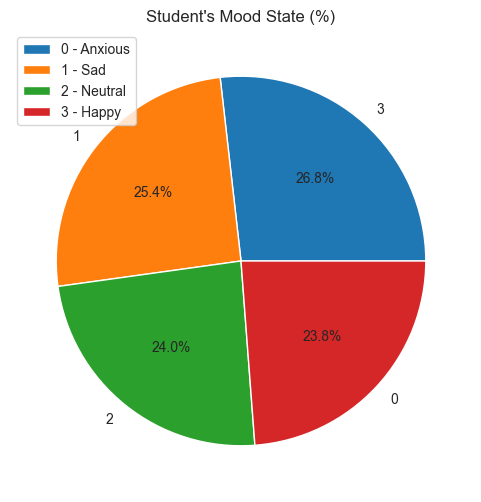

In [10]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Mood State'].value_counts(),labels = data['Mood State'].value_counts().index,autopct='%1.1f%%')
plt.legend(['0 - Anxious','1 - Sad','2 - Neutral','3 - Happy'])
plt.title("Student's Mood State (%)")
plt.show()

In [11]:
data['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

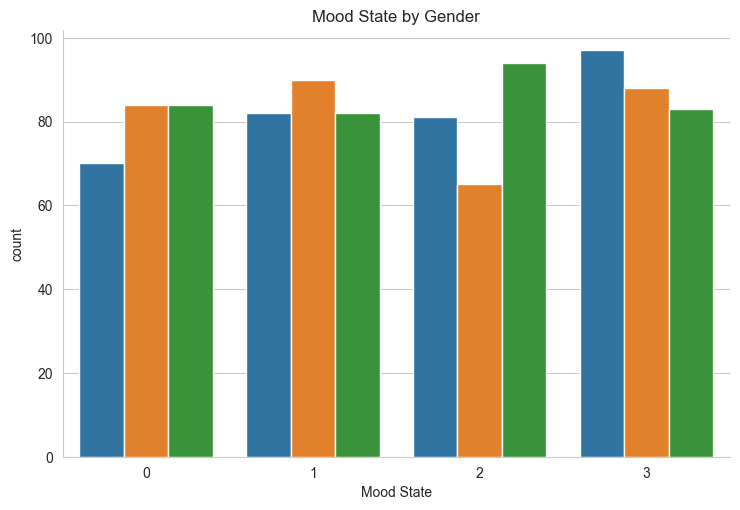

In [12]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Mood State"].notna()], x = "Mood State", kind = 'count', hue = "Gender", legend = False, height = 5, aspect = 3/2)
plt.title("Mood State by Gender")
plt.show()

In [13]:
data["Psychological State"] = data["Psychological State"].map({'Anxious':0,"Stressed":1,"Relaxed":2,"Focused":3}).astype("int64", errors="ignore")

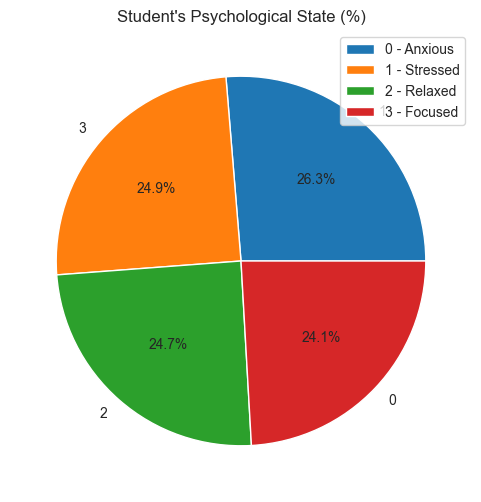

In [14]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Psychological State'].value_counts(),labels = data['Psychological State'].value_counts().index,autopct='%1.1f%%')
plt.legend(['0 - Anxious','1 - Stressed','2 - Relaxed','3 - Focused'])
plt.title("Student's Psychological State (%)")
plt.show()

In [15]:
data["Cognitive Load"] = data["Cognitive Load"].map({'Low':0,"Moderate":1,"High":2}).astype("int64", errors="ignore")

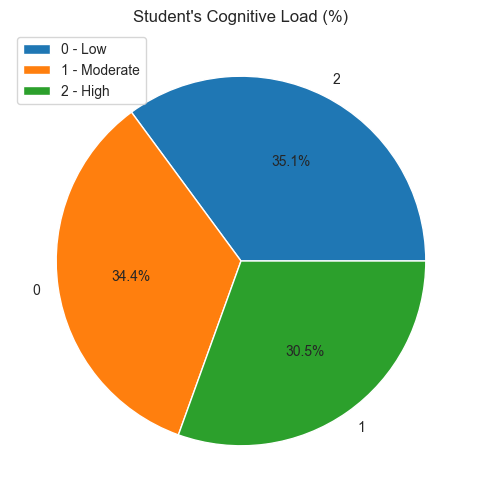

In [16]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Cognitive Load'].value_counts(),labels = data['Cognitive Load'].value_counts().index,autopct='%1.1f%%')
plt.legend(['0 - Low','1 - Moderate','2 - High'])
plt.title("Student's Cognitive Load (%)")
plt.show()

## Feature description

### Categorical

In [17]:
data.dtypes[data.dtypes == 'object']

EEG Power Bands          object
Blood Pressure (mmHg)    object
Task Type                object
Gender                   object
Educational Level        object
Study Major              object
dtype: object

In [18]:
data.describe(include=['O'])

,EEG Power Bands,Blood Pressure (mmHg),Task Type,Gender,Educational Level,Study Major
count,1000,1000,1000,1000,1000,1000
unique,1000,373,4,3,3,3
top,"[0.7583653347946298, 1.423247998317594, 0.6157...",128/75,Group Discussion,Other,Undergraduate,Arts
freq,1,8,259,343,338,337


/Users/anfrejter/Documents/GitHub/psychological-state-classification/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


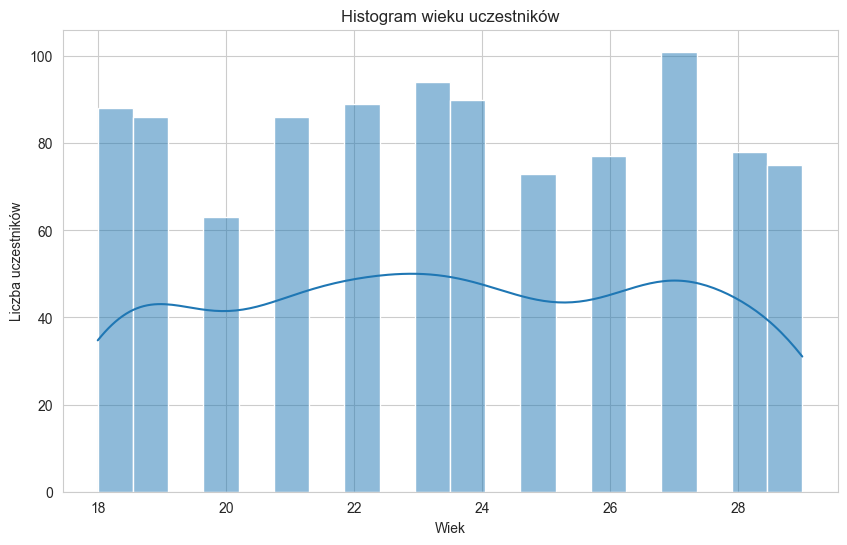

In [19]:
# Histogram wieku uczestników
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Histogram wieku uczestników')
plt.xlabel('Wiek')
plt.ylabel('Liczba uczestników')
plt.show()

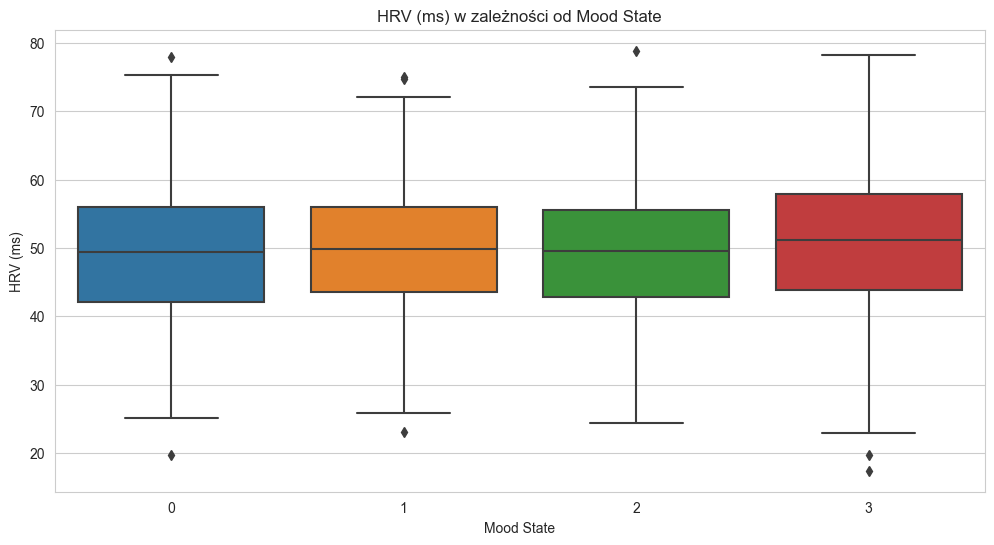

In [20]:
# Wykres pudełkowy dla HRV (ms) w zależności od Mood State
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mood State', y='HRV (ms)', data=data)
plt.title('HRV (ms) w zależności od Mood State')
plt.xlabel('Mood State')
plt.ylabel('HRV (ms)')
plt.show()

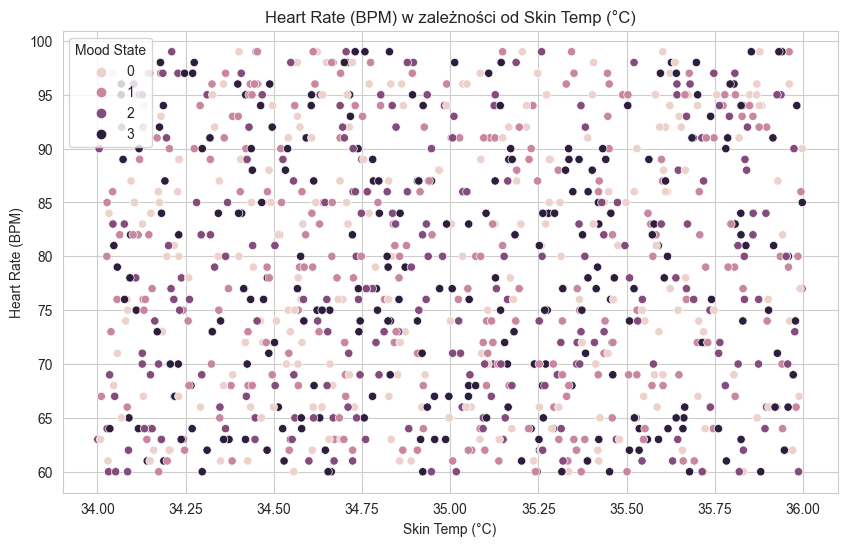

In [21]:
# Wykres rozrzutu dla Heart Rate (BPM) w zależności od Skin Temp (°C)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Skin Temp (°C)', y='Heart Rate (BPM)', hue='Mood State', data=data)
plt.title('Heart Rate (BPM) w zależności od Skin Temp (°C)')
plt.xlabel('Skin Temp (°C)')
plt.ylabel('Heart Rate (BPM)')
plt.legend(title='Mood State')
plt.show()